In [2]:
import pandas as pd
import numpy as np
import re
import string
import itertools
import os.path
import pickle as pkl
import json
from tqdm import tqdm
import matplotlib.pyplot as plt

# Search for exact matches

In [5]:
# years = ['2022', '2023',
        #  '2020', '2021', '2010', '2024', '2030', '2050']
year = '2022'

# load titles
titles_df = pd.read_csv(
    f'../samples/gptneo/{year}/titles.txt', sep='\n\n', header=None)
titles_gen = titles_df[0].str.strip('\"\' ')
titles_len = titles_df[0].str.split().apply(len)

titles_new_df = pd.read_pickle('../data/df_test_recent.pkl')
titles_new = titles_new_df.title

# plt.hist(titles_len)
# plt.xlabel('Title num words')
# plt.ylabel('Count')
# plt.show()

# Look for exact matches
# For this to be kosher, need to make sure the model never saw
# any titles within the dates of the test set.
titles_overlap = []
tg = titles_gen.str.lower().str.strip().values
tn = titles_new.str.lower().str.strip().values
print('# generated titles', tg.size, '# GT titles', tn.size)

# exact matches
for title_gen in tg:
    if title_gen in tn:
        print(title_gen)
print('# exact matches', len(titles_overlap))

# generated titles 5000 # GT titles 14895
# exact matches 0


/tmp/ipykernel_354835/3310117271.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  titles_df = pd.read_csv(


# Look at closest BLEU matches

In [18]:
closest_matches = pkl.load(open(f'../samples/gptneo/{year}/closest_matches_{year}.pkl', 'rb'))

In [19]:
closest_matches

{'tg': array(['understanding the effect of data augmentation in generative adversarial networks',
        'adversarial attacks on graph neural networks',
        'differentiable reinforcement learning for continuous control',
        ..., 'multilevel self-modulation for low-latency communication',
        'bipedal, unipedal, bipedal and unipodal human locomotion',
        'neural model-based inversion for pervasive inertial measurements'],
       dtype=object),
 'tn': array(['understanding the effect of data augmentation in self-supervised anomaly detection',
        'sparse vicious attacks on graph neural networks',
        'normality-guided distributional reinforcement learning for continuous control',
        ...,
        'cedar: communication efficient distributed analysis for regressions',
        'learning semantics-aware locomotion skills from human demonstration',
        'convolutional neural networks for image spam detection'],
       dtype=object),
 'bleu': array([6.38943104

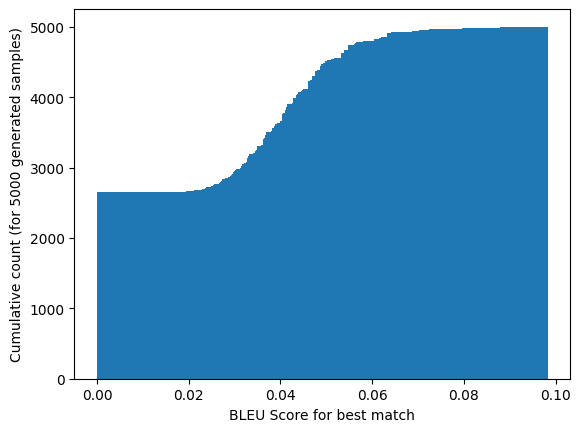

In [38]:
bleu = closest_matches['bleu']
plt.hist(bleu, cumulative=True, bins=5000)
plt.xlabel('BLEU Score for best match')
plt.ylabel('Cumulative count (for 5000 generated samples)')
plt.savefig('../docs/figs/bleu.svg', bbox_inches='tight')
plt.show()

In [43]:
N = 10
for i in range(N):
    print(i)
    print('\tGenerated:', closest_matches['tg'][i].capitalize())
    print('\tReal:', closest_matches['tn'][i].capitalize())
    print('\t', closest_matches['bleu'][i])

0
	Generated: Understanding the effect of data augmentation in generative adversarial networks
	Real: Understanding the effect of data augmentation in self-supervised anomaly detection
	 0.09828989611606707
1
	Generated: Adversarial attacks on graph neural networks
	Real: Sparse vicious attacks on graph neural networks
	 0.09457409162941297
2
	Generated: Differentiable reinforcement learning for continuous control
	Real: Normality-guided distributional reinforcement learning for continuous control
	 0.09457409162941297
3
	Generated: Multilevel representation learning for time series forecasting
	Real: Out-of-distribution representation learning for time series classification
	 0.09457409162941297
4
	Generated: Unsupervised feature learning for medical image segmentation
	Real: Distributed contrastive learning for medical image segmentation
	 0.09457409162941297
5
	Generated: Deepreci: deep reinforcement learning for continuous control
	Real: Normality-guided distributional reinforcemen